# The notebook with all the shit

## Import python packages

In [1]:
import xarray as xr
xr.set_options(display_style='html')
import intake
import cftime
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
%matplotlib inline

## Reading file from bucket

In [2]:
import s3fs
s3 = s3fs.S3FileSystem(key="K1CQ7M1DMTLUFK182APD", 
                       secret="3JuZAQm5I03jtpijCpHOdkAsJDNLNfZxBpM15Pi0", 
                       client_kwargs=dict(endpoint_url="https://rgw.met.no"))
s3.ls('escience2022')

['escience2022/Ada',
 'escience2022/Antoine',
 'escience2022/Dominic',
 'escience2022/ESA_SMOS_sss',
 'escience2022/Remy',
 'escience2022/Sara',
 'escience2022/Zhihong']

In [3]:
#s3path = "s3://escience2022/Zhihong/o3_AERmon_GISS-E2-1-G_historical_r1i1p3f1_gn_185001-190012.nc"
# Using cb_O3 because it is cummulative ozone without the levels
s3path = 's3://escience2022/Zhihong/NFHISTnorpddmsbc_tropstratchem_f09_mg17_20220105_test14/cb_O3.NFHISTnorpddmsbc_tropstratchem_f09_mg17_20220105_test14.cam.h0.197001-201412.nc'

In [4]:
#do = xr.open_dataset(s3.open(s3path))
#do

### Get metadata corresponding to near-surface air temperature (tas)

In [5]:
#print(do['cb_O3'])

In [6]:
#do.time.values;

In [7]:
#Converting Ozone to Dobson units:
#https://sacs.aeronomie.be/info/dobson.php
#do['cb_O3']=do['cb_O3']/(2.1415*(10**(-5)))

#do

### Select time

- Select a specific time

In [8]:
#do['cb_O3'].sel(time=cftime.DatetimeNoLeap(1970, 7, 1,0,0,0)).plot(cmap = 'coolwarm')

- select the nearest time. Here from 1st April 1950

In [9]:
#do['cb_O3'].sel(time=cftime.DatetimeNoLeap(1850, 4, 1), method='nearest').plot(x = 'lon',cmap='coolwarm')

# Customize plot

### Set the size of the figure and add coastlines

In [10]:
#fig = plt.figure(1, figsize=[30,13])

# Set the projection to use for plotting
#ax = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
#ax.coastlines()

# Pass ax as an argument when plotting. Here we assume data is in the same coordinate reference system than the projection chosen for plotting
# isel allows to select by indices instead of the time values
#do['cb_O3'].isel(time=6).squeeze().plot.pcolormesh(ax=ax, cmap='coolwarm')

### Change plotting projection

In [11]:
#fig = plt.figure(1, figsize=[10,10])

# We're using cartopy and are plotting in Orthographic projection 
# (see documentation on cartopy)
#ax = plt.subplot(1, 1, 1, projection=ccrs.Orthographic(0, 90))
#ax.coastlines()

# We need to project our data to the new Orthographic projection and for this we use `transform`.
# we set the original data projection in transform (here PlateCarree)
#do['cb_O3'].isel(time=6).squeeze().plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm')

# One way to customize your title
#plt.title(do.time.values[6].strftime("%B %Y"), fontsize=18)

### Choose the extent of values
- Fix your minimum and maximum values in your plot and
- Use extend so values below the minimum and max

In [12]:
#fig = plt.figure(1, figsize=[10,10])
#
#ax = plt.subplot(1, 1, 1, projection=ccrs.Orthographic(0, 90))
#ax.coastlines()
#
##Fix extent
#minval = do['cb_O3'].min()
#maxval = do['cb_O3'].max()
#
##pass extent with vmin and vmax parameters
#do['cb_O3'].isel(time=6).squeeze().plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm')
#
##One way to customize your title
#plt.title(do.time.values[6].strftime("%B %Y"), fontsize=18)


# Multiplots
### Faceting

In [13]:
#proj_plot = ccrs.Orthographic(0, 90)
#
#p = do['cb_O3'].sel(time = do.time.dt.year.isin([1986,1987,1988,1989,1990,1991])).squeeze().plot(x='lon', y='lat', 
#                                                                 transform=ccrs.PlateCarree(),
#                                                                 aspect=do.dims["lon"] / do.dims["lat"],  # for a sensible figsize
#                                                                 subplot_kws={"projection": proj_plot},
#                                                                 col='time', col_wrap=6, robust=True, cmap='PiYG')
## We have to set the map's options on all four axes
#for ax,i in zip(p.axes.flat,  do.time.sel(time = do.time.dt.year.isin([1986,1987,1988,1989,1990,1991])).values):
#    ax.coastlines()
#    ax.set_title(i.strftime("%B %Y"), fontsize=18)

### Combine plots with different projections

In [14]:
#fig = plt.figure(1, figsize=[20,10])

# Fix extent
#minval = do['cb_O3'].min()
#maxval = do['cb_O3'].max()

# Plot 1 for Northern Hemisphere subplot argument (nrows, ncols, nplot)
# here 1 row, 2 columns and 1st plot
#ax1 = plt.subplot(1, 2, 1, projection=ccrs.Orthographic(0, 90))

# Plot 2 for Southern Hemisphere
# 2nd plot 
#ax2 = plt.subplot(1, 2, 2, projection=ccrs.Orthographic(180, -90))

#tsel = 7
#for ax,t in zip([ax1, ax2], ["Northern", "Southern"]):
    #map = do['cb_O3'].isel(time=tsel).squeeze().plot(ax=ax, 
                                           #transform=ccrs.PlateCarree(), 
                                           #cmap='coolwarm', 
                                           #add_colorbar=False)
    #ax.set_title(t + " Hemisphere \n" , fontsize=15)
    #ax.coastlines()
    #ax.gridlines()

# Title for both plots
#fig.suptitle('O3\n' + do.time.values[tsel].strftime("%B %Y"), fontsize=20)


#cb_ax = fig.add_axes([0.325, 0.05, 0.4, 0.04])

#cbar = plt.colorbar(map, cax=cb_ax, extend='both', orientation='horizontal', fraction=0.046, pad=0.04)
#cbar.ax.tick_params(labelsize=25)
#cbar.ax.set_ylabel('K', fontsize=25)

In [15]:
#month_length = do.time.dt.days_in_month

#wgts = month_length.groupby("time.year") / month_length.groupby("time.year").sum()

#np.testing.assert_allclose(wgts.groupby("time.year").sum(xr.ALL_DIMS), 1.0)


#da= (do.cb_O3*wgts).groupby('time.year').sum(dim='time')
#da

In [16]:
#doy=do.groupby('time.year').mean('time')
#doy




#doO3_be=da.sel(lon=1, lat=90, method='nearest').sel(year = da.year.isin([1985,1986,1987,1988,1989,1990,1991]))
#doO3_af=da.sel(lon=1, lat=90, method='nearest').sel(year = da.year.isin([1991,1992,1993,1994,1995,1996,1997]))



#mean_be=doO3_be.mean()
#mean_af=doO3_af.mean()


#O3_anomaly_be=mean_be-doO3_be
#O3_anomaly_af=mean_af-doO3_af

#doO3_be.plot(x='year')
#doO3_af.plot(x='year')

#plt.legend()


### Anomaly in weighted aera

In [17]:
def computeWeightedMean(ds):
    # Compute weights based on the xarray you pass
    weights = np.cos(np.deg2rad(ds.lat))
    weights.name = "weights"
    # Compute weighted mean
    air_weighted = ds.weighted(weights)
    weighted_mean = air_weighted.mean(("lon", "lat"))
    return weighted_mean

In [18]:
def mean_plot_doub(data,data2):
    #Funftion that calculated weighted means, anomalies and plots it.
    #Reads in two datasets

    #Selecting time period in datasets
    ds = data.sel(time=slice(start,end))
    ds2 = data2.sel(time=slice(start,end))
    
    #Claculating climatology, annual mean and anomaly
    climatology = ds.sel(time=slice(start, end_prior_eruption)).groupby('time.year').mean('time',keep_attrs=True).mean('year')
    annual_mean = ds.groupby('time.year').mean('time')
    anom=annual_mean-climatology
    
    climatology2 = ds2.sel(time=slice(start, end_prior_eruption)).groupby('time.year').mean('time',keep_attrs=True).mean('year')
    annual_mean2 = ds2.groupby('time.year').mean('time')
    anom2=annual_mean2-climatology2
    
    #Computing the weighted mean for different regions
    north_anomaly = computeWeightedMean(anom.where(anom['lat']>60.)).compute()
    south_anomaly = computeWeightedMean(anom.where(anom['lat']<-60.)).compute()
    global_anomaly= computeWeightedMean(anom).compute()
    
    north_anomaly2 = computeWeightedMean(anom2.where(anom2['lat']>60.)).compute()
    south_anomaly2 = computeWeightedMean(anom2.where(anom2['lat']<-60.)).compute()
    global_anomaly2= computeWeightedMean(anom2).compute()
    
    
    #Plotting
    fig, (axs1, axs2, axs3) = plt.subplots(1, 3, constrained_layout=True, figsize=(20,10))

    north_anomaly.plot(label="NorESM 14", ax=axs1)
    north_anomaly2.plot(label='NorESM 16', ax=axs1)
    
    south_anomaly.plot(label="NorESM 14", ax=axs2)
    south_anomaly2.plot(label='NorESM 16', ax=axs2)
    
    global_anomaly.plot(label="NorESM 14",ax=axs3)
    global_anomaly2.plot(label='NorESM 16', ax=axs3)

    fig.suptitle('Total Ozone column\n', fontsize=20)

    axs1.set_xlabel('Year',fontsize=20)
    axs2.set_xlabel('Year',fontsize=20)
    axs3.set_xlabel('Year',fontsize=20)
    #axs1.tick_params(fontsize=20)

    axs1.grid()
    axs2.grid()
    axs3.grid()

    axs1.set_title(" Northern Hemisphere \n" , fontsize=15)
    axs2.set_title(" Southern Hemisphere \n" , fontsize=15)
    axs3.set_title('Global Mean \n', fontsize=15)
    plt.legend(fontsize=25)
   

In [19]:
def mean_plot_sing(data):
    #Funftion that calculated weighted means, anomalies and plots it
    #Reads in only one dataset

    #Selecting time period in datasets
    ds = data.sel(time=slice(start,end))
    
    #Claculating climatology, annual mean and anomaly
    climatology = ds.sel(time=slice(start, end_prior_eruption)).groupby('time.year').mean('time',keep_attrs=True).mean('year')
    annual_mean = ds.groupby('time.year').mean('time')
    anom=annual_mean-climatology
       
    #Computing the weighted mean for different regions
    north_anomaly = computeWeightedMean(anom.where(anom['lat']>60.)).compute()
    south_anomaly = computeWeightedMean(anom.where(anom['lat']<-60.)).compute()
    global_anomaly= computeWeightedMean(anom).compute()
    
    #Plotting
    fig, (axs1, axs2, axs3) = plt.subplots(1, 3, constrained_layout=True, figsize=(20,10))

    north_anomaly.plot(label="NorESM 14", ax=axs1)
    
    south_anomaly.plot(label="NorESM 14", ax=axs2)
    
    global_anomaly.plot(label="NorESM 14",ax=axs3)

    fig.suptitle('Total Ozone column\n', fontsize=20)

    axs1.set_xlabel('Year',fontsize=20)
    axs2.set_xlabel('Year',fontsize=20)
    axs3.set_xlabel('Year',fontsize=20)
    #axs1.tick_params(fontsize=20)
    
    axs1.grid()
    axs2.grid()
    axs3.grid()

    axs1.set_title(" Northern Hemisphere \n" , fontsize=15)
    axs2.set_title(" Southern Hemisphere \n" , fontsize=15)
    axs3.set_title('Global Mean \n', fontsize=15)
    plt.legend(fontsize=25)
   

In [20]:
def forcing_plot(data):
    df = data.sel(time=slice(start,end))
    
    north = computeWeightedMean(df.where(df['lat']>60.)).compute()
    south = computeWeightedMean(df.where(df['lat']<-60.)).compute()
    global_f= computeWeightedMean(df).compute()

    fig, (axs1, axs2, axs3) = plt.subplots(1, 3, constrained_layout=True, figsize=(20,10))

    north.plot(label="NorESM", ax=axs1)

    south.plot(label="NorESM", ax=axs2)

    global_f.plot(label="NorESM",ax=axs3)

    fig.suptitle('SO4\n', fontsize=20)

    axs1.grid()
    axs2.grid()
    axs3.grid()


    axs1.set_title(" Northern Hemisphere \n" , fontsize=15)
    axs2.set_title(" Southern Hemisphere \n" , fontsize=15)
    axs3.set_title('Globam Mean \n', fontsize=15)
    plt.legend(fontsize=25)

In [58]:
def multi_plot(data):
    proj_plot = ccrs.Robinson(central_longitude=0, globe=None)

    p = data.sel(time = data.time.dt.year.isin([1884])).squeeze().plot(x='lon', y='lat', 
                                                                     transform=ccrs.PlateCarree(),
                                                                     #aspect=dso4_3.dims["lon"] / dso4_3.dims["lat"],  # for a sensible figsize
                                                                     subplot_kws={"projection": proj_plot},
                                                                     col='time', col_wrap=4, robust=True, cmap='PiYG')
    # We have to set the map's options on all four axes
    for ax,i in zip(p.axes.flat,  data.time.sel(time = data.time.dt.year.isin([1884])).values):
        ax.coastlines()
        ax.set_title(i.strftime("%B %Y"), fontsize=18)

## CODE

In [21]:
#Reading in ozone data from experiment 16
s6path = 's3://escience2022/Zhihong/NFHISTnorpddmsbc_tropstratchem_f09_mg17_20220105_test16/cb_O3.NFHISTnorpddmsbc_tropstratchem_f09_mg17_20220105_test16.cam.h0.197001-201412.nc'
d2 = xr.open_dataset(s3.open(s6path))
d2.time.values;
ds2=d2['cb_O3']/(2.1415*(10**(-5)))

In [22]:
#Data from experiment 14
do = xr.open_dataset(s3.open(s3path))
do.time.values;
ds=do['cb_O3']/(2.1415*(10**(-5)))
#assign_attrs({'units': '$^\circ$C'})

#ds

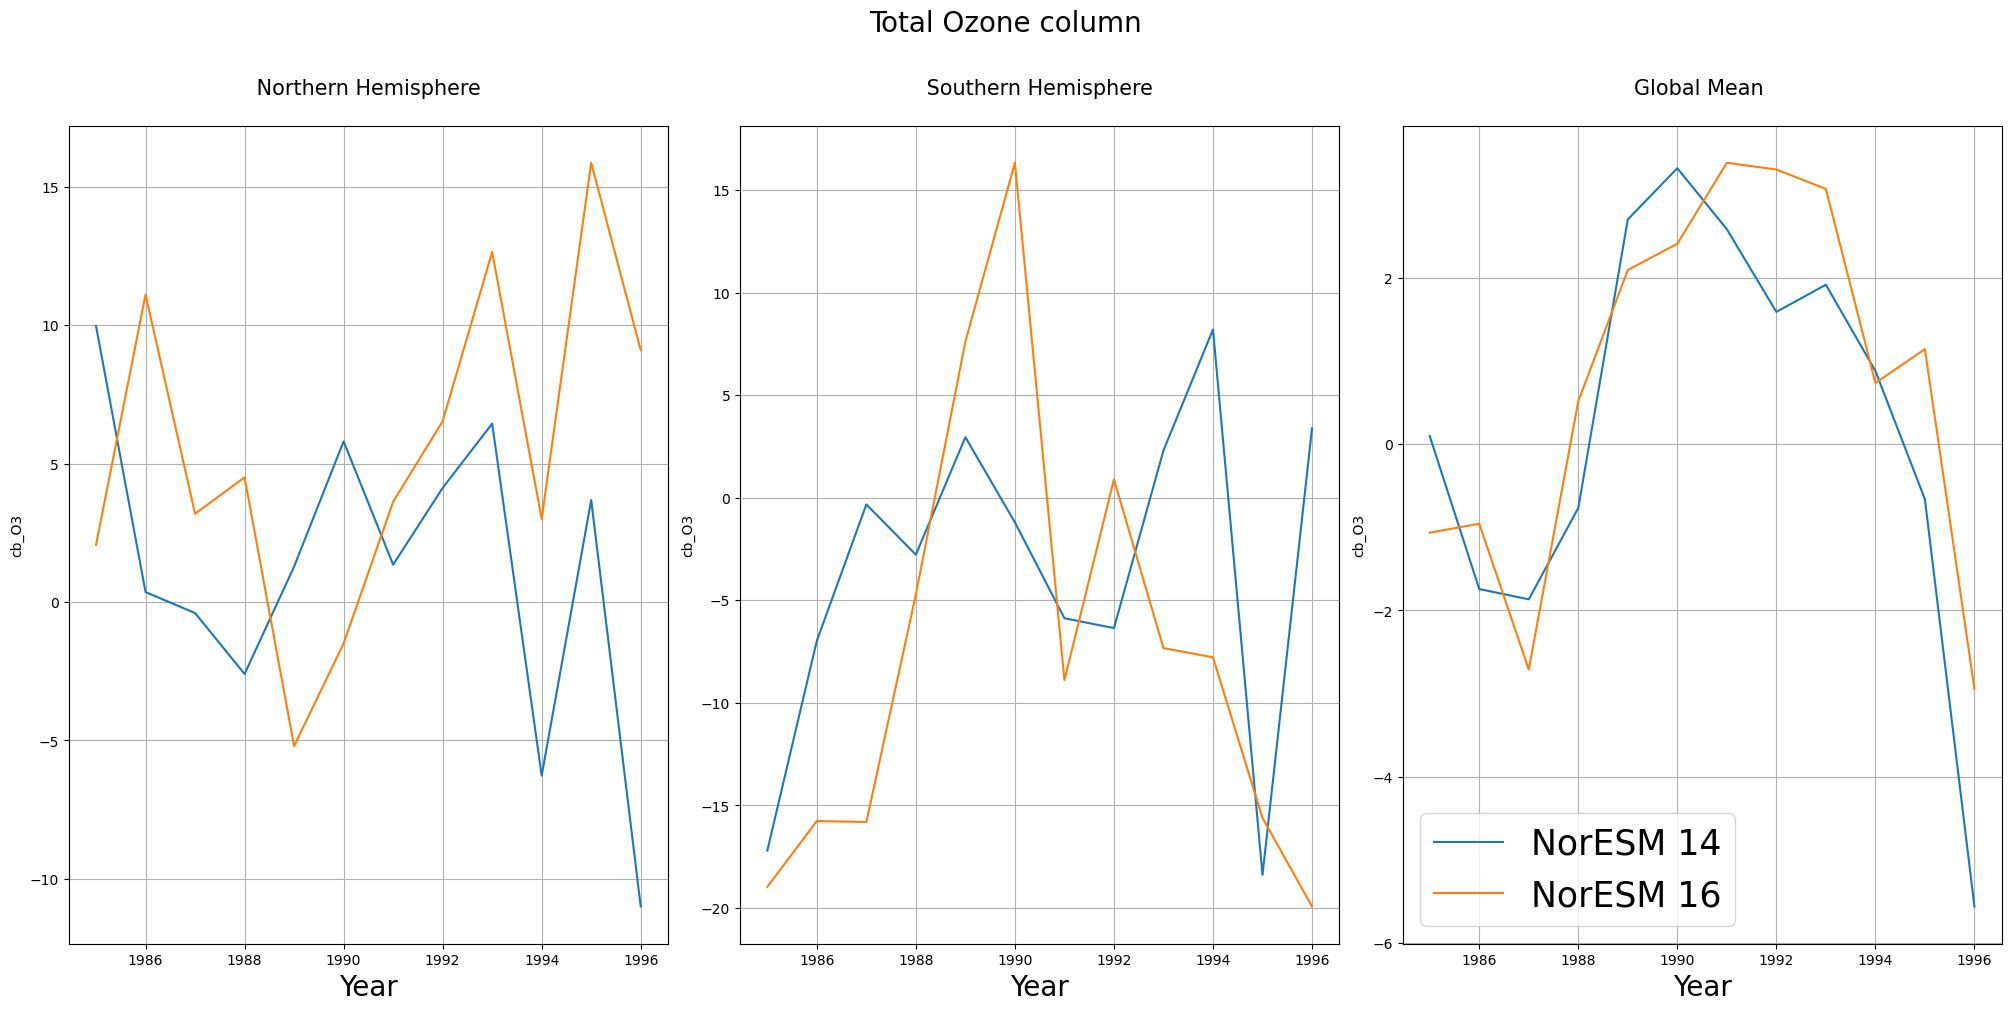

In [23]:
start = cftime.DatetimeNoLeap(1985,1,15)
end_prior_eruption = cftime.DatetimeNoLeap(1991,1,15)
end = cftime.DatetimeNoLeap(1996,1,15)

mean_plot_doub(ds,ds2)

In [24]:
#n_diff = computeWeightedMean(difference.where(difference['lat']>60.)).compute()
#s_diff = computeWeightedMean(difference.where(difference['lat']<-60.)).compute()
#g_diff= computeWeightedMean(difference).compute()

In [25]:
#fig, (axs1, axs2, axs3) = plt.subplots(1, 3, constrained_layout=True, figsize=(20,10))
#
##w_m_w_n_anomaly.sel(time=slice(start,end)).plot(label="CAM", ax=axs1)
#n_diff.plot(label="NorESM", ax=axs1)
##weighted_mean_waccm.sel(time=slice(start,end)).plot(label="WACCM-org", ax=axs1)
#
##w_m_w_south_anomaly.sel(time=slice(start,end)).plot(label="CAM", ax=axs2)
#s_diff.plot(label="NorESM", ax=axs2)
##weighted_mean_waccm_south.sel(time=slice(start,end)).plot(label="WACCM-org", ax=axs2)
#
#g_diff.plot(label="NorESM",ax=axs3)
#
#fig.suptitle('Total Ozone column\n', fontsize=20)
#
#axs1.set_title(" Northern Hemisphere \n" , fontsize=15)
#axs2.set_title(" Southern Hemisphere \n" , fontsize=15)
#axs3.set_title('Globam Mean \n', fontsize=15)
#plt.legend(fontsize=25)

In [26]:
#Reading in temp data from experiment 14
s7path = 's3://escience2022/Zhihong/NFHISTnorpddmsbc_tropstratchem_f09_mg17_20220105_test14/T.NFHISTnorpddmsbc_tropstratchem_f09_mg17_20220105_test14.cam.h0.197001-201412.nc'
dt = xr.open_dataset(s3.open(s7path))
dt.time.values;
dtt=dt['T'].isel(lev=-1)

In [27]:
mean_dt=dtt.drop('lev')

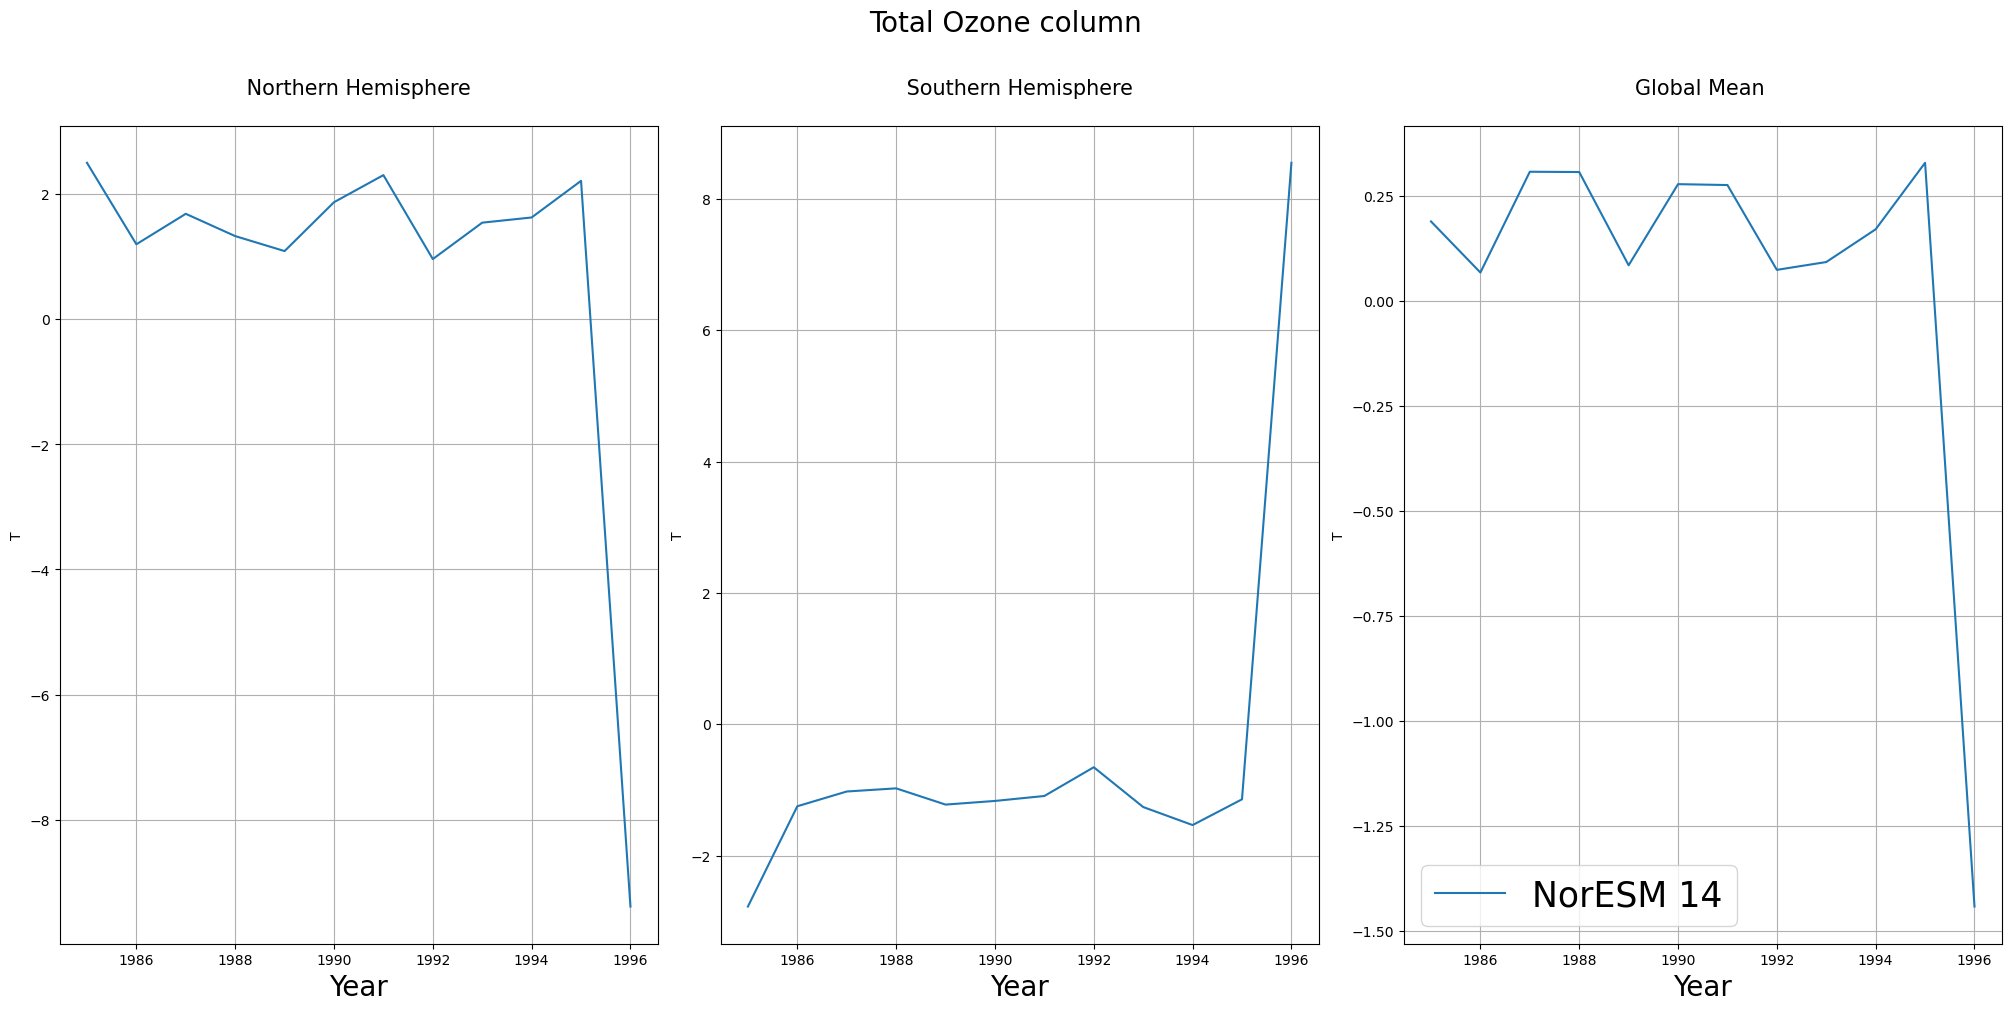

In [28]:
start = cftime.DatetimeNoLeap(1985,1,15)
end_prior_eruption = cftime.DatetimeNoLeap(1991,1,15)
end = cftime.DatetimeNoLeap(1996,1,15)

mean_plot_sing(mean_dt)


### Sulfate


In [29]:
s4path = 's3://escience2022/Zhihong/NFHISTnorpddmsbc_tropstratchem_f09_mg17_20220105_test14/cb_SULFATE.NFHISTnorpddmsbc_tropstratchem_f09_mg17_20220105_test14.cam.h0.197001-201412.nc'
du = xr.open_dataset(s3.open(s4path))
du.time.values;

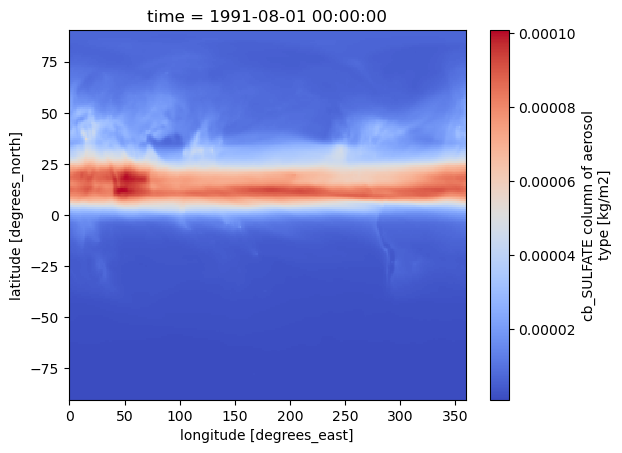

In [30]:
du['cb_SULFATE'].sel(time=cftime.DatetimeNoLeap(1991, 8, 1,0,0,0)).plot(cmap = 'coolwarm')

In [31]:
s5path = 's3://escience2022/Zhihong/NFHISTnorpddmsbc_tropstratchem_f09_mg17_20220105_test14/D550_SO4.NFHISTnorpddmsbc_tropstratchem_f09_mg17_20220105_test14.cam.h0.197001-201412.nc'
da = xr.open_dataset(s3.open(s5path))
dr = da['D550_SO4']
dr;


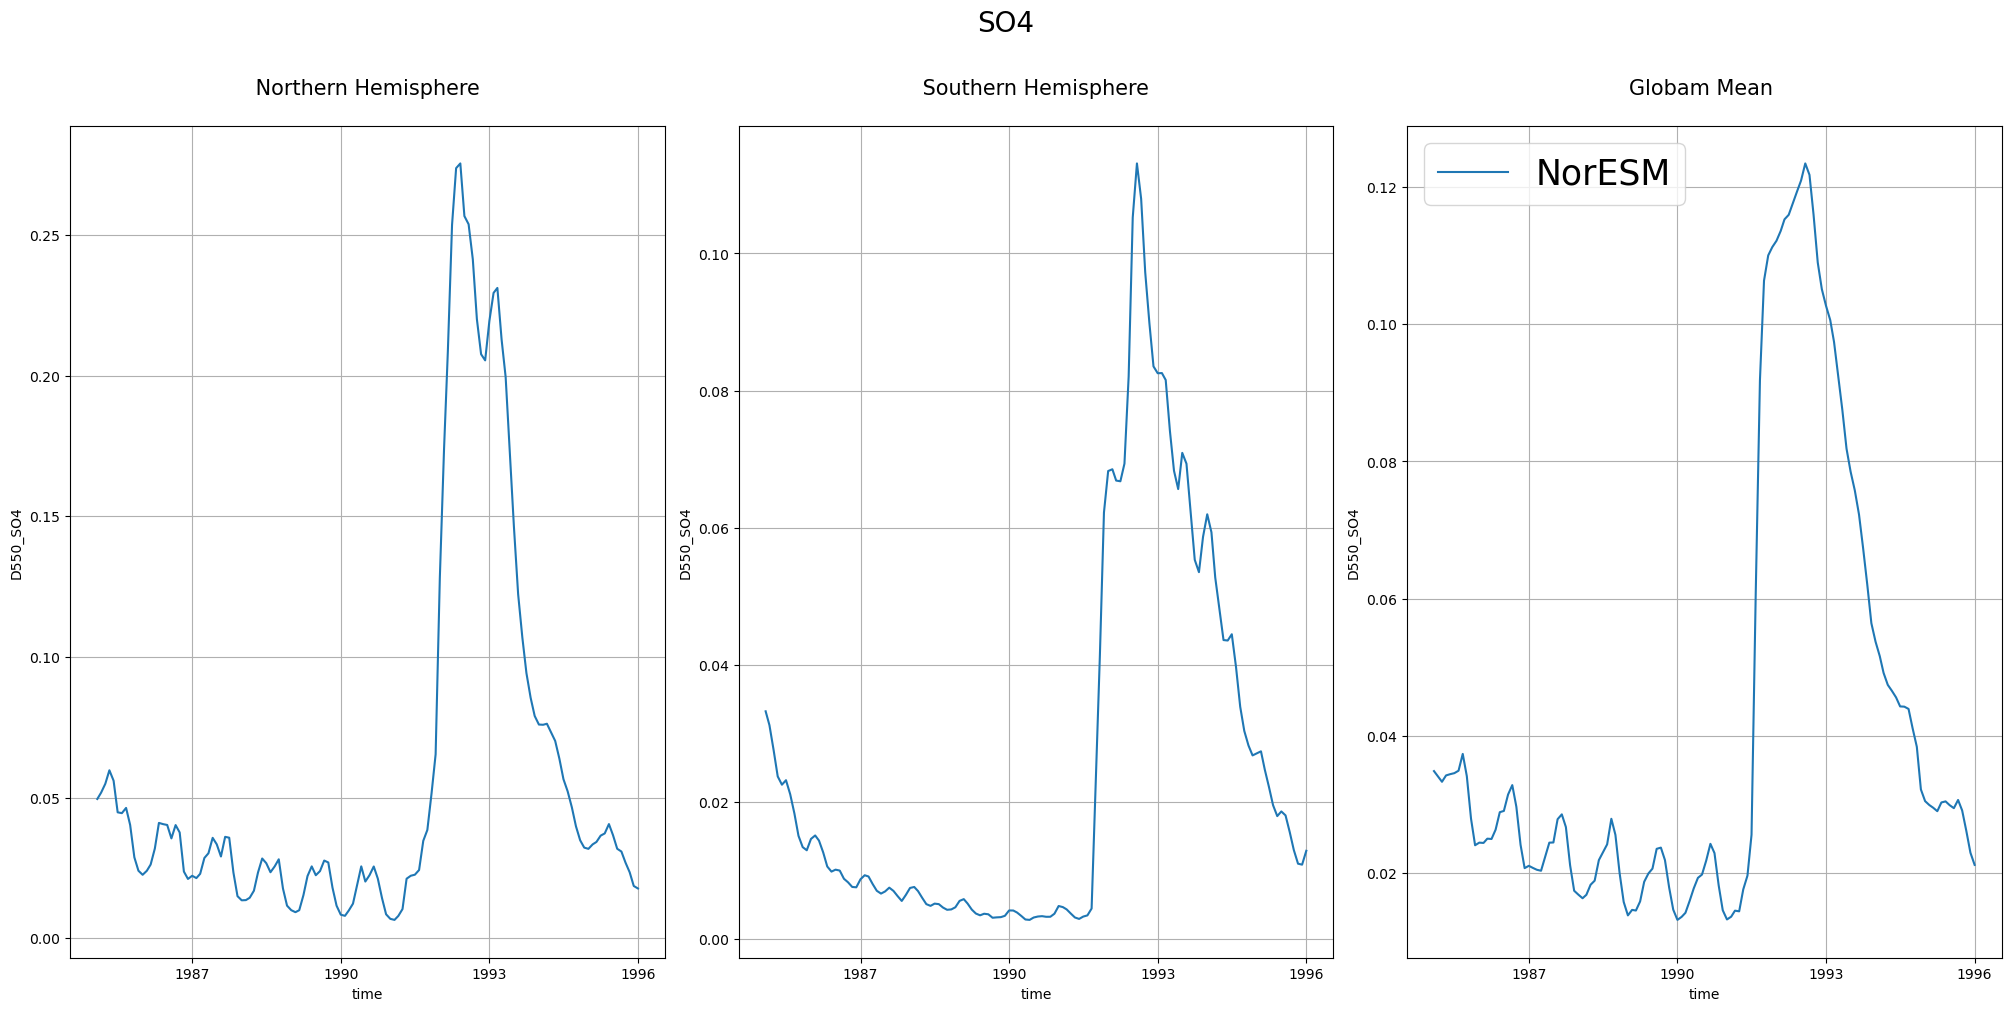

In [32]:
start = cftime.DatetimeNoLeap(1985,1,15)
end_prior_eruption = cftime.DatetimeNoLeap(1991,1,15)
end = cftime.DatetimeNoLeap(1996,1,15)

forcing_plot(dr)

## Looking into data from around Krakatao

In [33]:
#Reading in ozone data from historical
his_path = 's3://escience2022/Zhihong/NHISTvsls/cb_O3.NHISTvsls_tropstratchem_prep_f09_nt14_20220223_test01.cam.h0.185001-189912.nc'
dh = xr.open_dataset(s3.open(his_path))
dh.time.values;
dh2=dh['cb_O3']/(2.1415*(10**(-5)))
dh2;


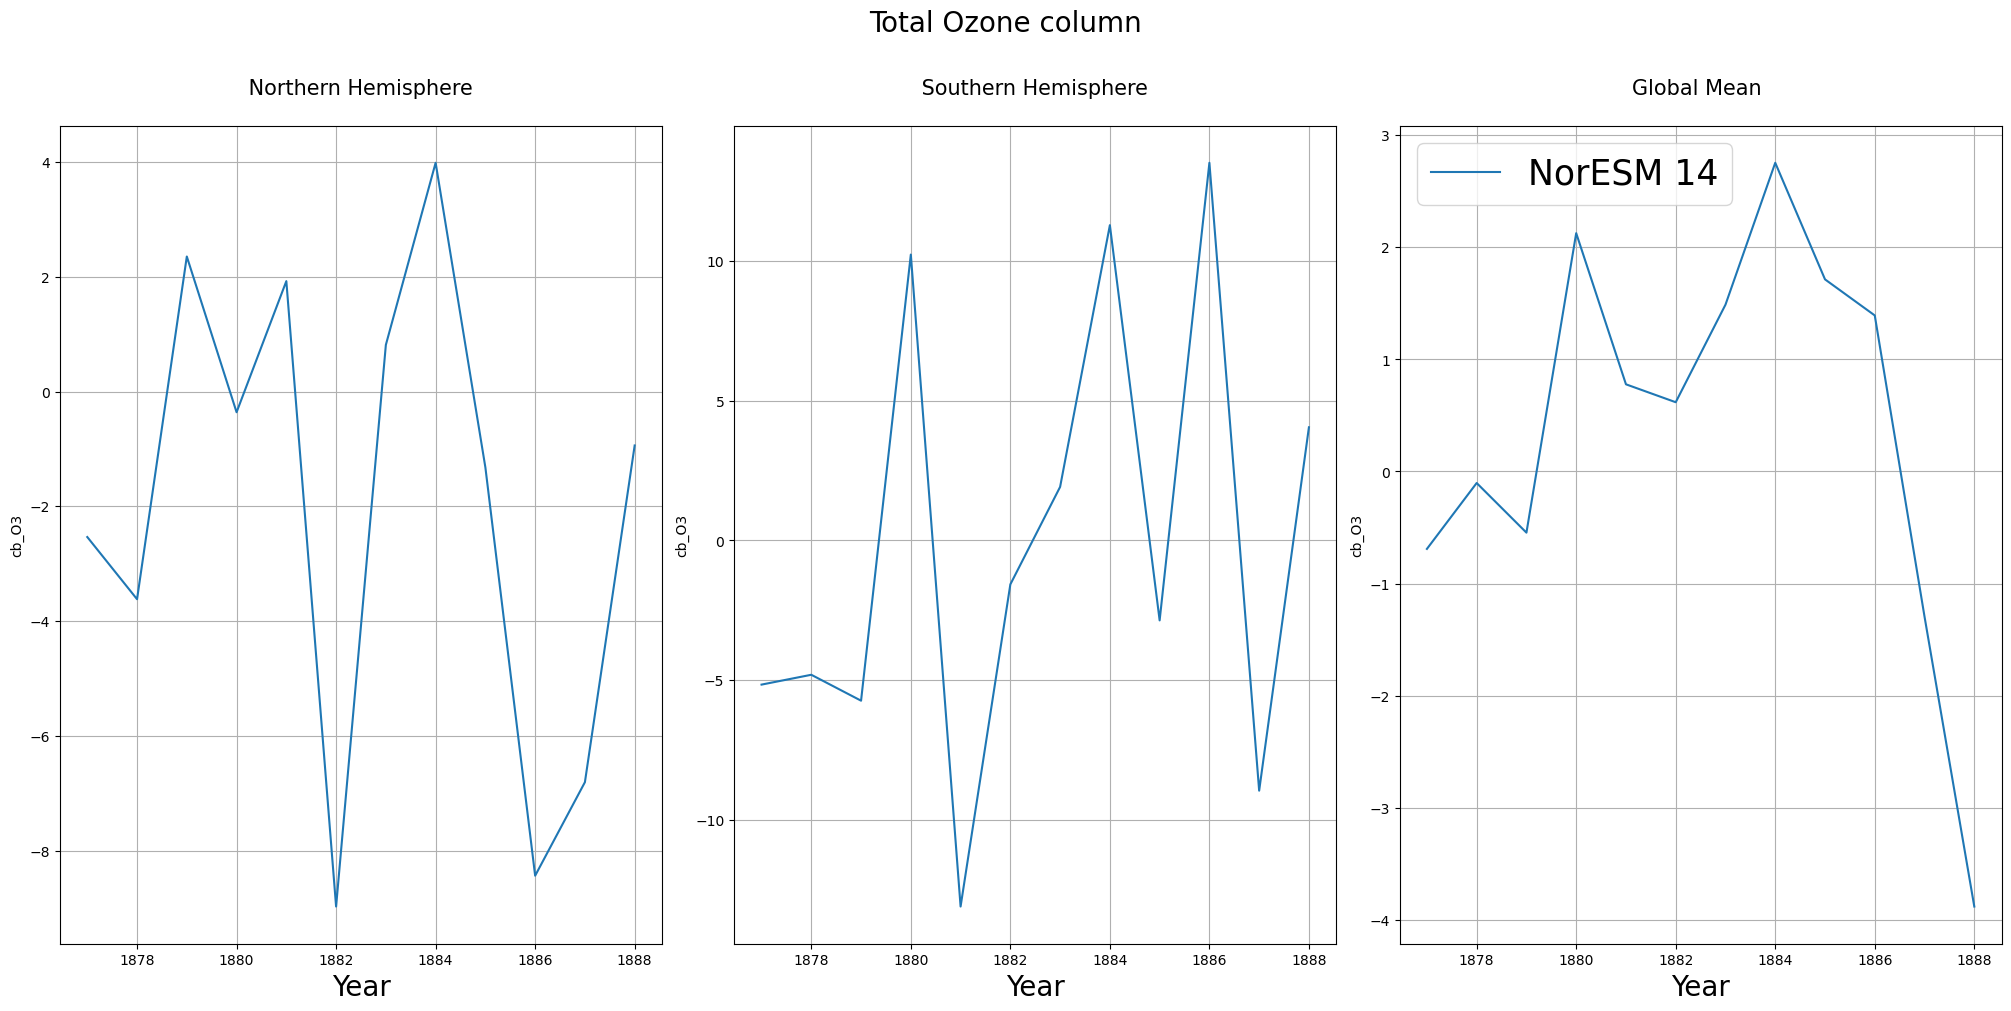

In [34]:
start = cftime.DatetimeNoLeap(1877,1,15)
end_prior_eruption = cftime.DatetimeNoLeap(1883,1,15)
end = cftime.DatetimeNoLeap(1888,1,15)

mean_plot_sing(dh2)

# Forcing


In [35]:
#Reading in aod data from historical
his_path_f = 's3://escience2022/Zhihong/NHISTvsls/D550_SO4.NHISTvsls_tropstratchem_prep_f09_nt14_20220223_test01.cam.h0.185001-189912.nc'
df = xr.open_dataset(s3.open(his_path_f))
df.time.values;
df2=df['D550_SO4']

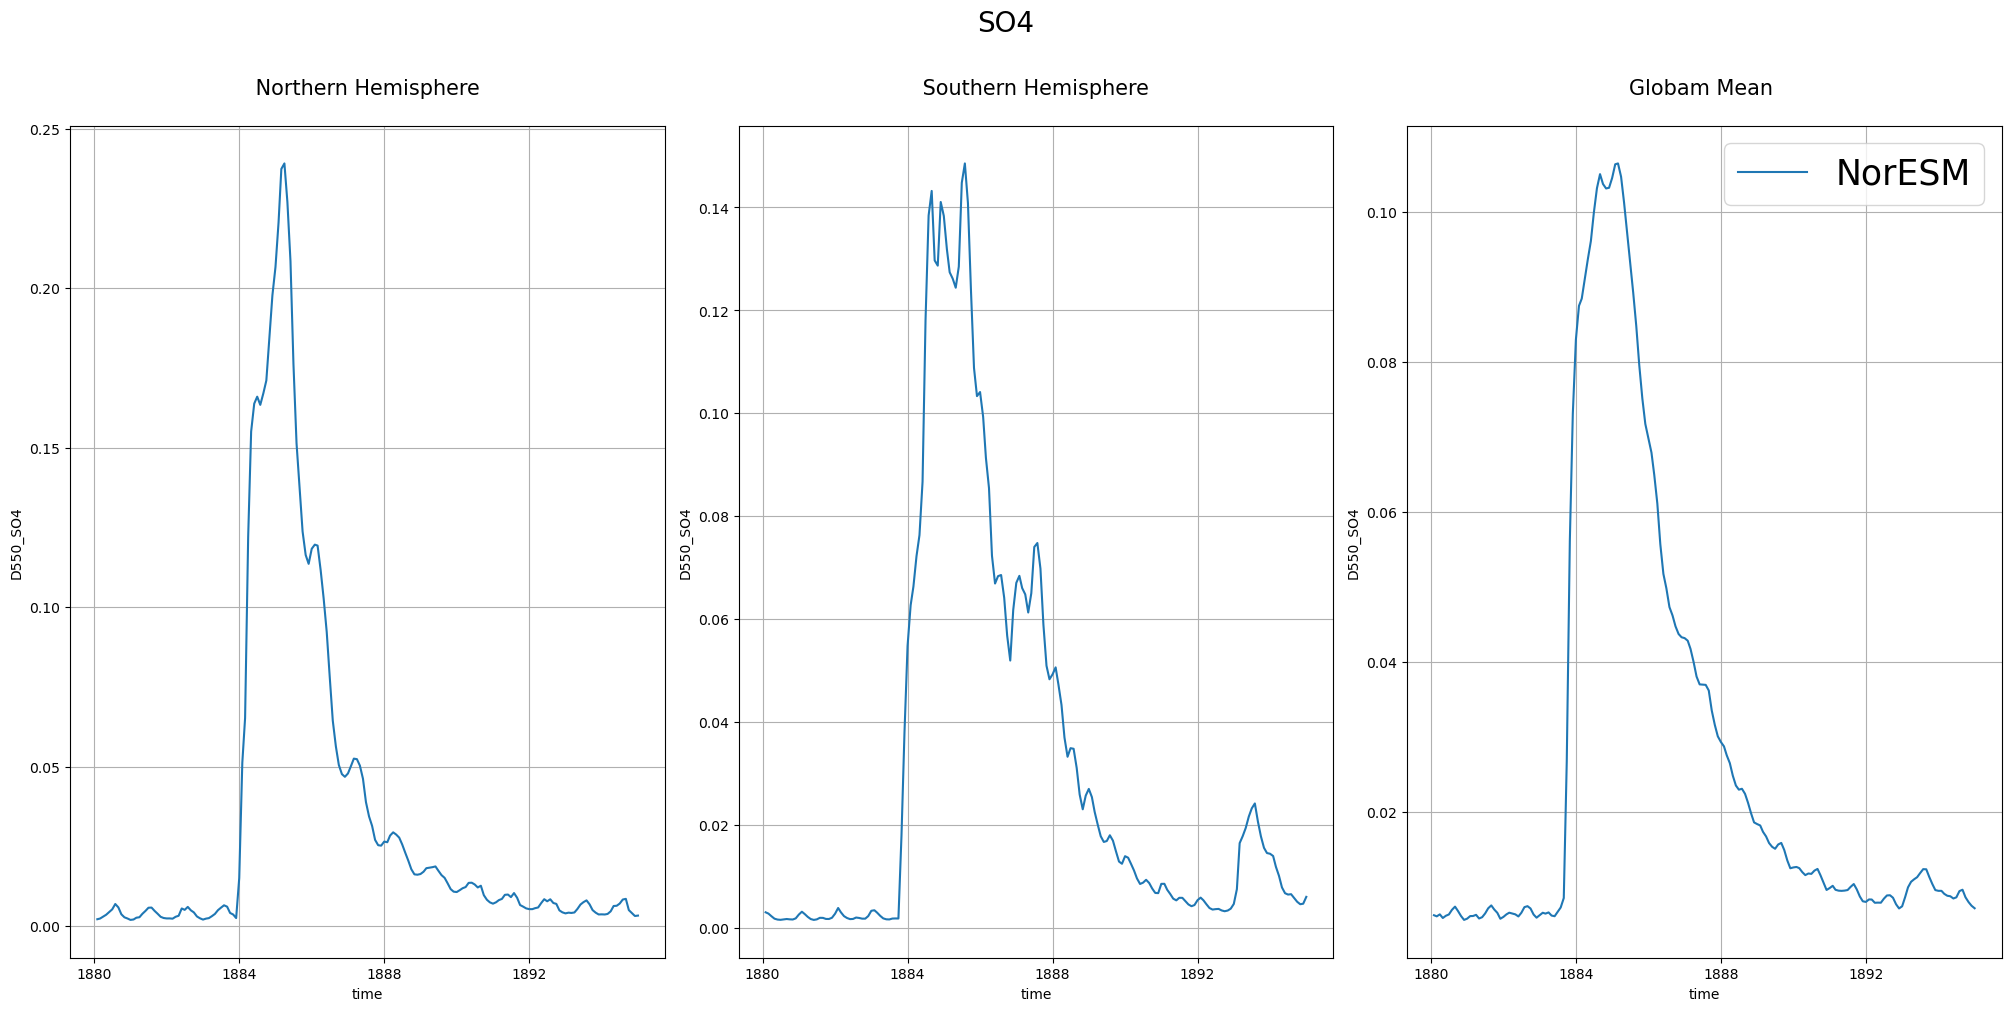

In [36]:
start = cftime.DatetimeNoLeap(1880,1,15)
end_prior_eruption = cftime.DatetimeNoLeap(1883,1,15)
end = cftime.DatetimeNoLeap(1895,1,15)

forcing_plot(df2)

## Layers and forcing

In [37]:
#Reading in SO4 layer data from historical
so4_l = 's3://escience2022/Zhihong/NHISTvsls/mmr_SULFATE.NHISTvsls_tropstratchem_prep_f09_nt14_20220223_test01.cam.h0.185001-189912.nc'
d4 = xr.open_dataset(s3.open(so4_l))
d4.time.values;
dso4=d4['mmr_SULFATE']
dso4_2=d4['mmr_SULFATE']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


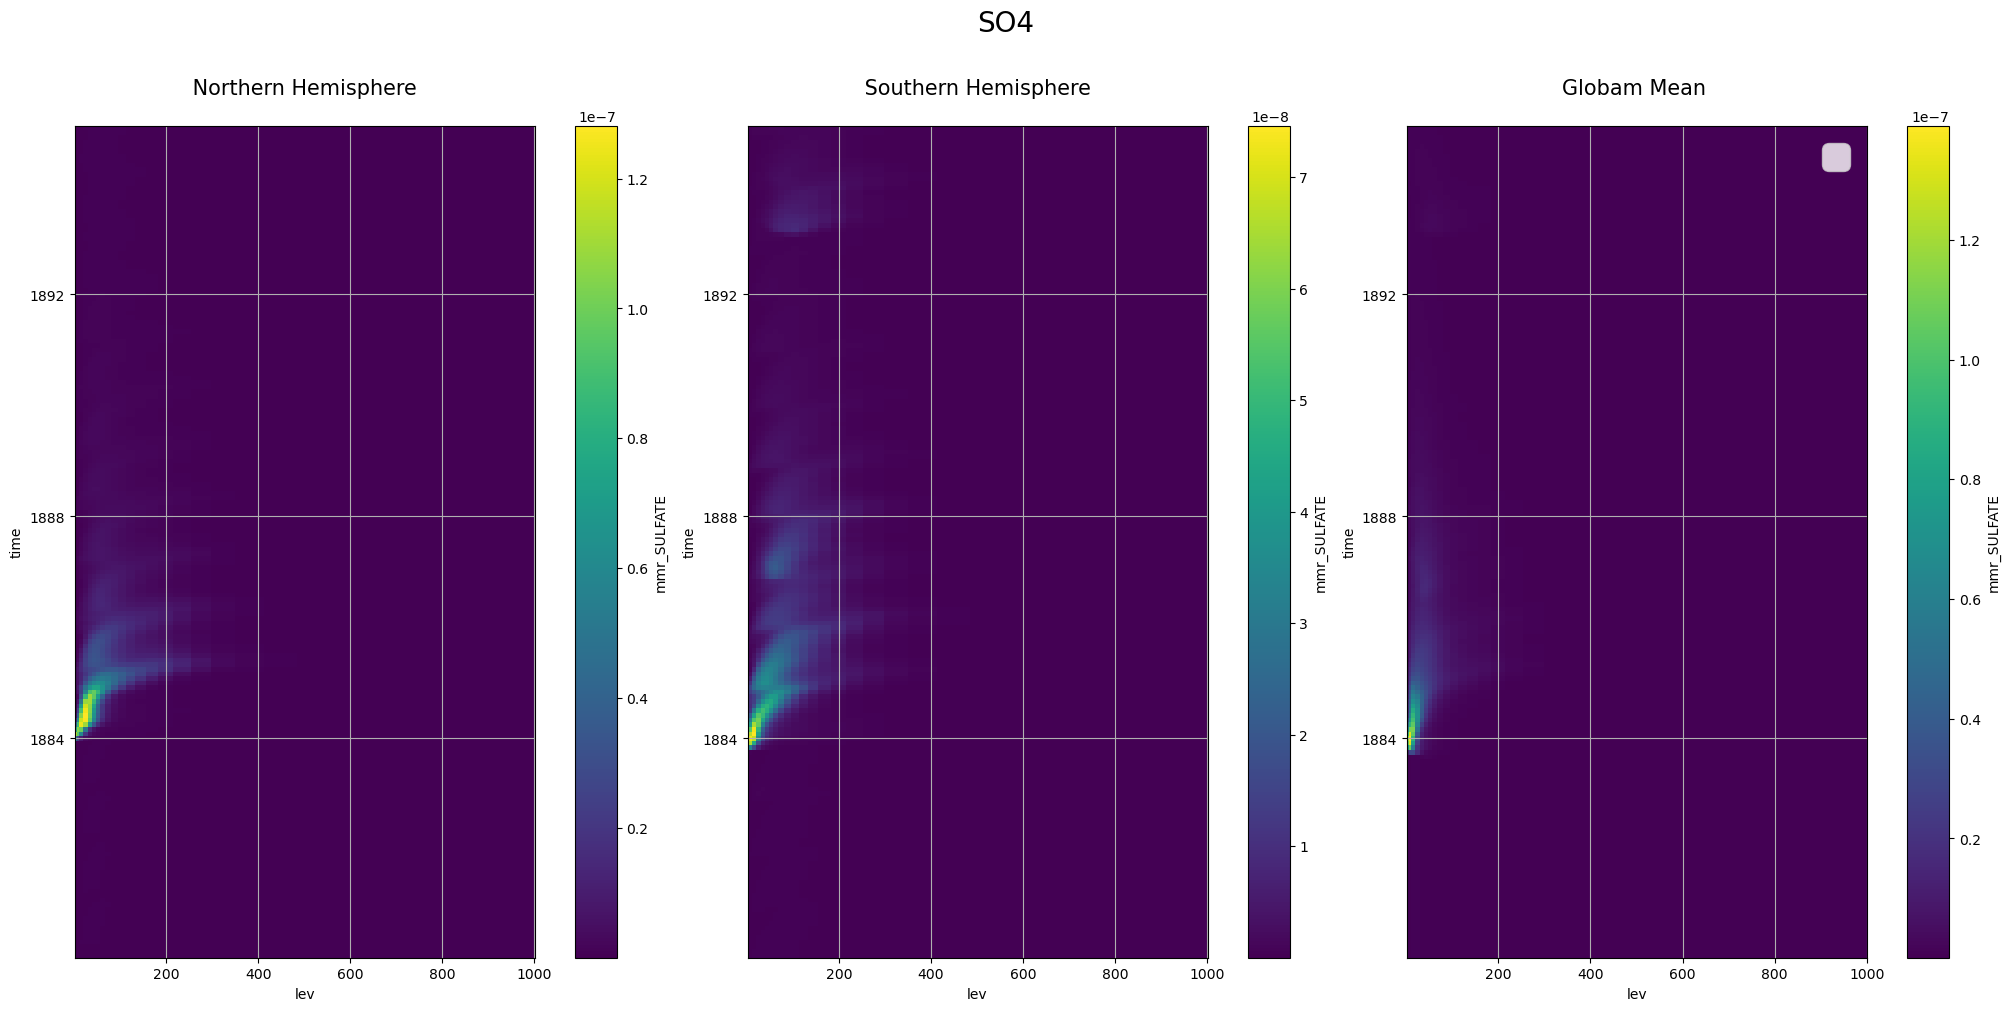

In [38]:
start = cftime.DatetimeNoLeap(1880,1,15)
end_prior_eruption = cftime.DatetimeNoLeap(1883,1,15)
end = cftime.DatetimeNoLeap(1895,1,15)
forcing_plot(dso4)

In [39]:
dso4.mean('lon')
north_anomaly = computeWeightedMean(dso4.where(dso4['lat']>60.)).compute()
start = cftime.DatetimeNoLeap(1880,1,15)
end_prior_eruption = cftime.DatetimeNoLeap(1883,1,15)
end = cftime.DatetimeNoLeap(1895,1,15)

dso4_s = north_anomaly.sel(time=slice(start,end))

In [40]:
#start = cftime.DatetimeNoLeap(1880,1,15)
#end_prior_eruption = cftime.DatetimeNoLeap(1883,1,15)
#end = cftime.DatetimeNoLeap(1895,1,15)

annual_mean = dso4_s.groupby('time.year').mean('time')

annual_means= annual_mean.isel(lev=slice(0,-20))
annual_means;

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


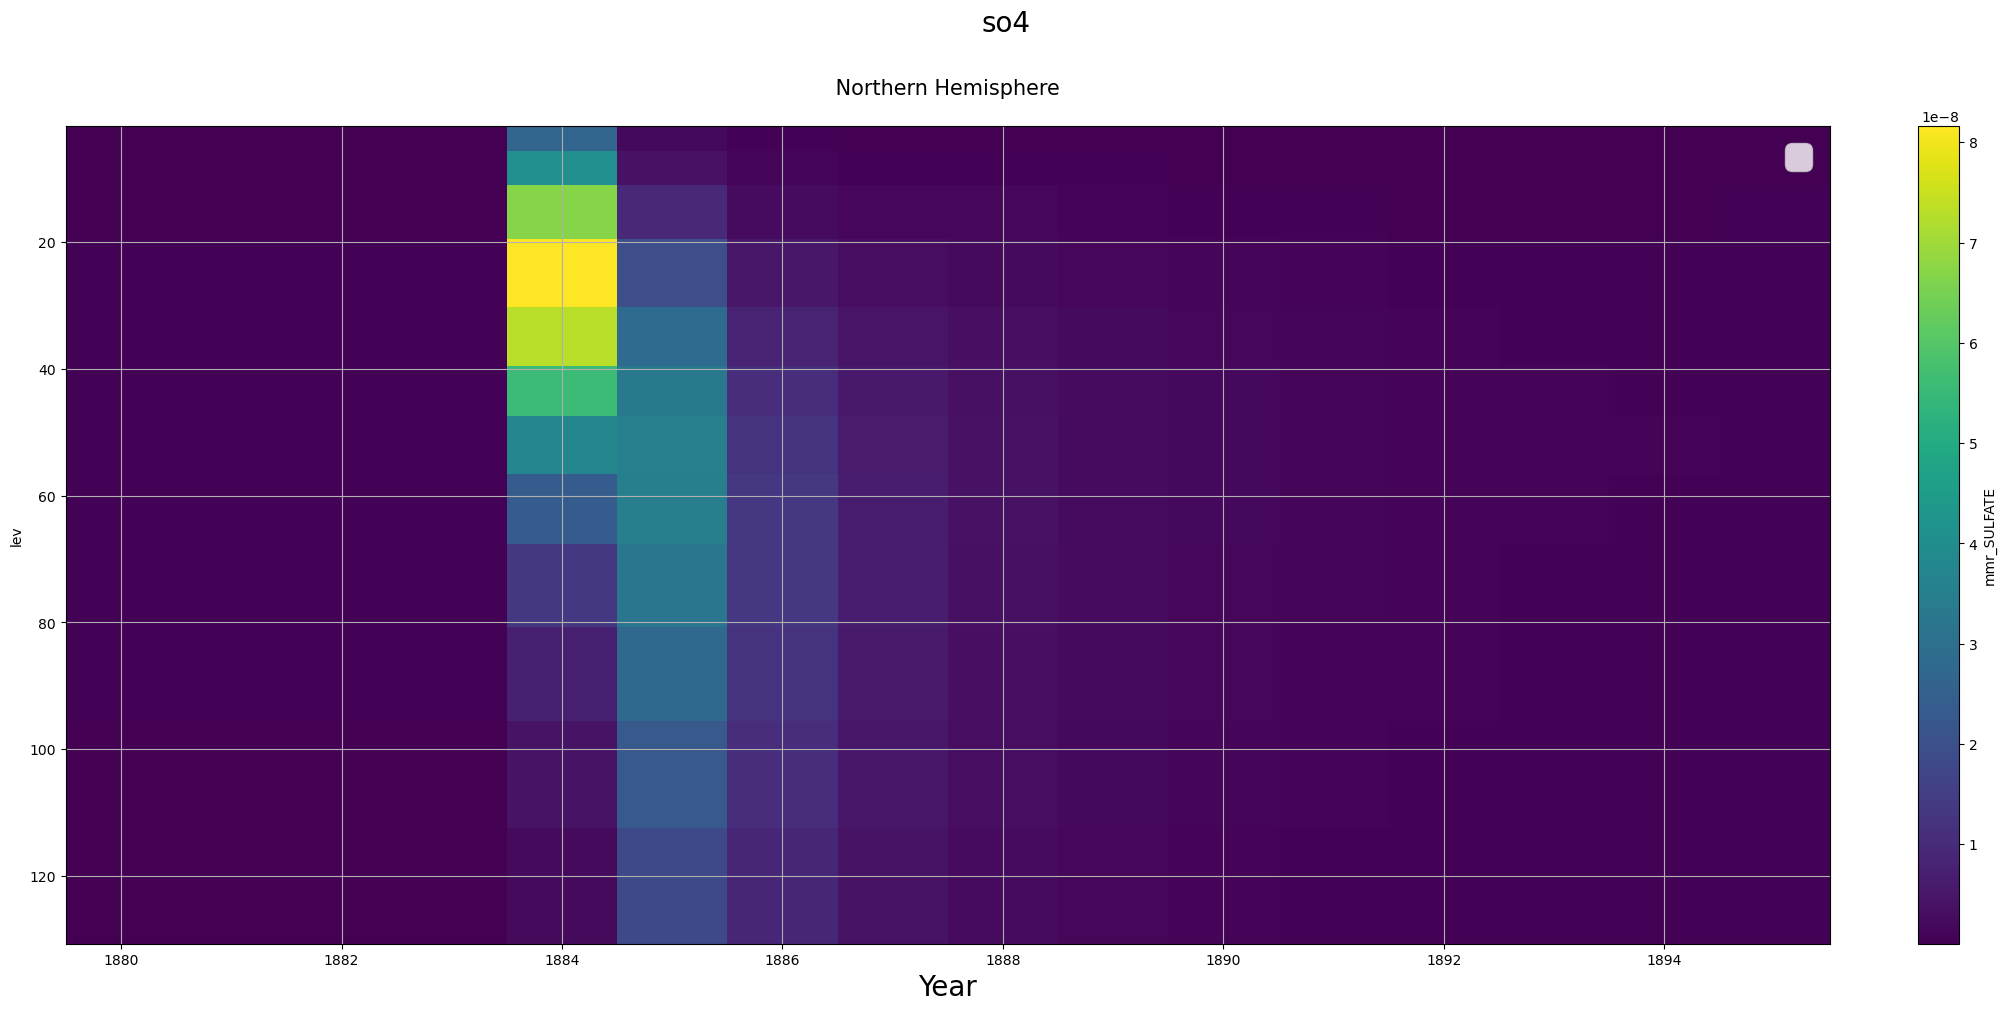

In [41]:
#Plotting
fig, (axs1) = plt.subplots(1, 1, constrained_layout=True, figsize=(20,10))

annual_means.plot(label="NorESM 14", ax=axs1,x='year')

#south_anomaly.plot(label="NorESM 14", ax=axs2)

#global_anomaly.plot(label="NorESM 14",ax=axs3)

fig.suptitle('so4\n', fontsize=20)

axs1.set_xlabel('Year',fontsize=20)
#axs2.set_xlabel('Year',fontsize=20)
#axs3.set_xlabel('Year',fontsize=20)
#axs1.tick_params(fontsize=20)

axs1.grid()
#axs2.grid()
#axs3.grid()

plt.gca().invert_yaxis()

axs1.set_title(" Northern Hemisphere \n" , fontsize=15)
#axs2.set_title(" Southern Hemisphere \n" , fontsize=15)
#axs3.set_title('Global Mean \n', fontsize=15)
plt.legend(fontsize=25)


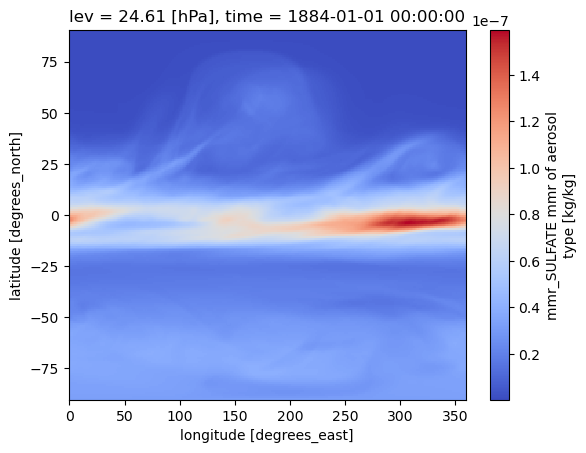

In [42]:
dso4_2.sel(time=cftime.DatetimeNoLeap(1884, 1, 1), method='nearest').sel(lev=24, method='nearest').plot(x = 'lon',cmap='coolwarm')

In [62]:
dso4_3=dso4_2.sel(lev=24, method='nearest').drop('lev')
dso4_3.time.values;
dso4_3;

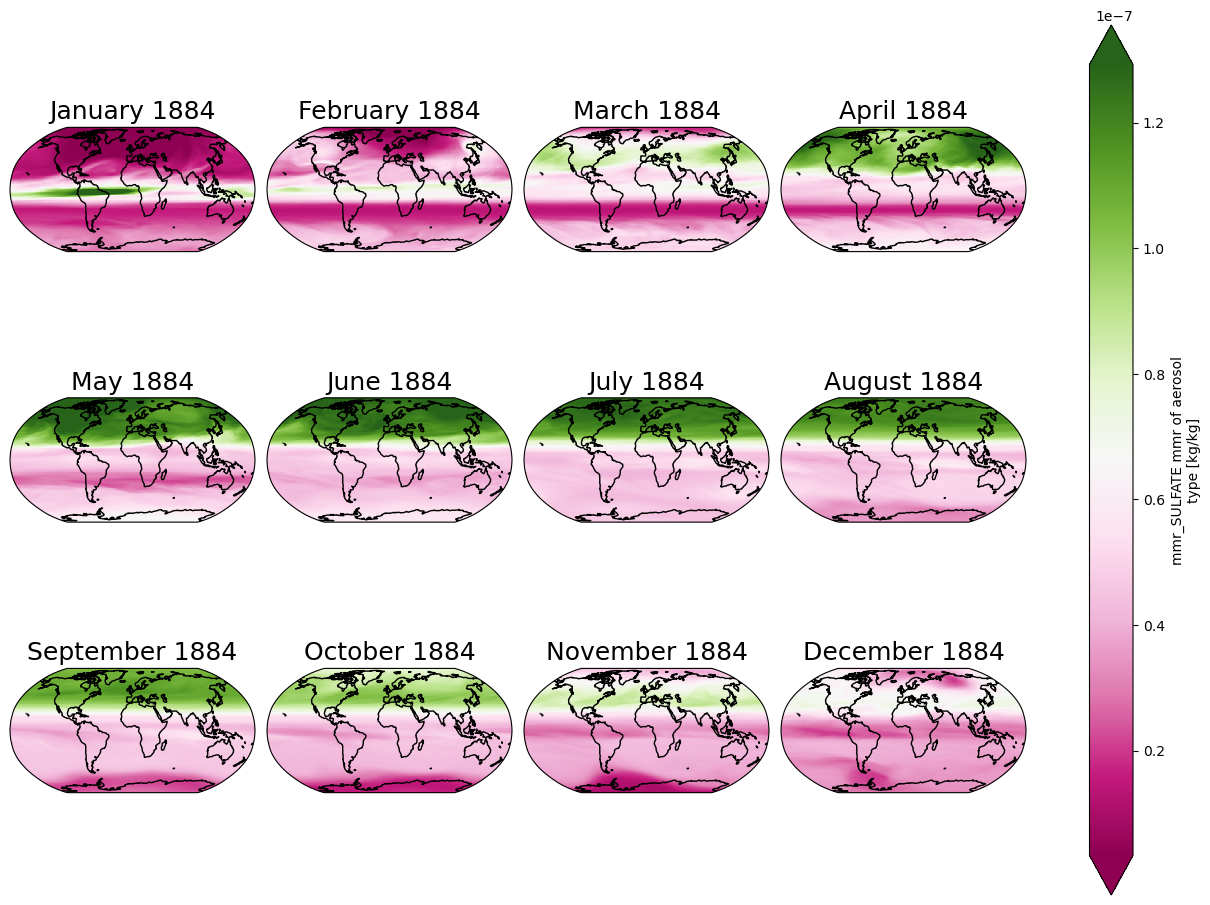

In [60]:
multi_plot(dso4_3)

In [45]:
#Reading in ozone layer data from historical
o3_l = 's3://escience2022/Zhihong/NHISTvsls/O3.NHISTvsls_tropstratchem_prep_f09_nt14_20220223_test01.cam.h0.185001-189912.nc'
o3_l2 = xr.open_dataset(s3.open(o3_l))
o3_l2.time.values;
ds_o3=o3_l2['O3']

In [68]:
ds_o3.mean('lon')
north_anomaly = computeWeightedMean(ds_o3.where(dso4['lat']>60.)).compute()
na_s = north_anomaly.sel(time=slice(start,end))
climatology = na_s.sel(time=slice(start, end_prior_eruption)).groupby('time.year').mean('time',keep_attrs=True).mean('year')
annual_mean = na_s.groupby('time.year').mean('time')

annual_meana= annual_mean.isel(lev=slice(0,-1))
annual_means=annual_means-climatology
annual_means

<xarray.DataArray 'O3' (year: 16, lev: 31)>
array([[-3.40108874e-07, -1.88329559e-07, -1.57982964e-07,
        -1.45824597e-07, -1.02765461e-07, -6.90643281e-08,
        -4.96437908e-08, -3.37503112e-08, -1.94251186e-08,
        -1.50676190e-08, -2.33010145e-08, -2.32246917e-08,
        -7.77812907e-09,  1.44882400e-08,  3.39704873e-08,
         3.88834554e-08,  2.65840943e-08,  1.29874705e-08,
         6.60490595e-09,  4.29646061e-09,  3.10876500e-09,
         2.23417303e-09,  1.51152913e-09,  1.00458366e-09,
         6.31742097e-10,  3.91199353e-10,  2.27394859e-10,
         8.35045696e-11, -5.26935537e-11, -1.92506404e-10,
        -3.35338142e-10],
       [-3.02532259e-07, -1.17072540e-07, -5.62128703e-08,
        -4.78988855e-08, -2.50575883e-08,  3.19110471e-09,
         1.72774057e-08,  1.57919764e-08,  6.88903951e-09,
        -4.41846389e-09, -6.76399319e-09,  1.05711371e-09,
         1.44702333e-08,  2.88237867e-08,  3.42061685e-08,
         2.34053128e-08,  8.47065924e-09,  3.42914819e-09,
         2.34734101e-09,  1.78470459e-09,  1.28050429e-09,
         8.33808881e-10,  4.60624739e-10,  1.43547941e-10,
        -8.91873490e-11, -2.23460497e-10, -3.21315926e-10,
...
         2.05495526e-08,  1.25558795e-08, -1.58165462e-08,
        -4.56812489e-08, -6.08879548e-08, -4.90496796e-08,
        -1.86873872e-08,  1.34956905e-08,  3.02498145e-08,
         2.55500822e-08,  1.21368394e-08,  5.15643115e-09,
         3.85159337e-09,  3.37488446e-09,  2.80737103e-09,
         2.25166278e-09,  1.68444051e-09,  1.23383594e-09,
         8.95192707e-10,  6.97670346e-10,  5.69941492e-10,
         4.60972015e-10,  3.63104523e-10,  2.64852792e-10,
         1.59402658e-10],
       [ 6.82089477e-07,  5.11635945e-07,  7.14381010e-07,
         6.91396327e-07,  4.97796962e-07,  2.67673010e-07,
         1.19335217e-07,  4.52054920e-08,  3.72131566e-08,
         3.30232526e-08,  1.82355905e-08, -1.68640443e-08,
        -5.51552780e-08, -7.94114047e-08, -8.45035338e-08,
        -5.98604825e-08, -2.69367493e-08, -1.28989995e-08,
        -9.45079864e-09, -7.29156678e-09, -5.28457453e-09,
        -3.47293327e-09, -2.05196034e-09, -9.61760251e-10,
        -2.00961248e-10,  2.38498001e-10,  5.28193239e-10,
         7.74098045e-10,  9.96025799e-10,  1.21137772e-09,
         1.43772884e-09]])
Coordinates:
  * lev      (lev) float64 3.643 7.595 14.36 24.61 ... 912.6 936.2 957.5 976.3
  * year     (year) int64 1880 1881 1882 1883 1884 ... 1891 1892 1893 1894 1895

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


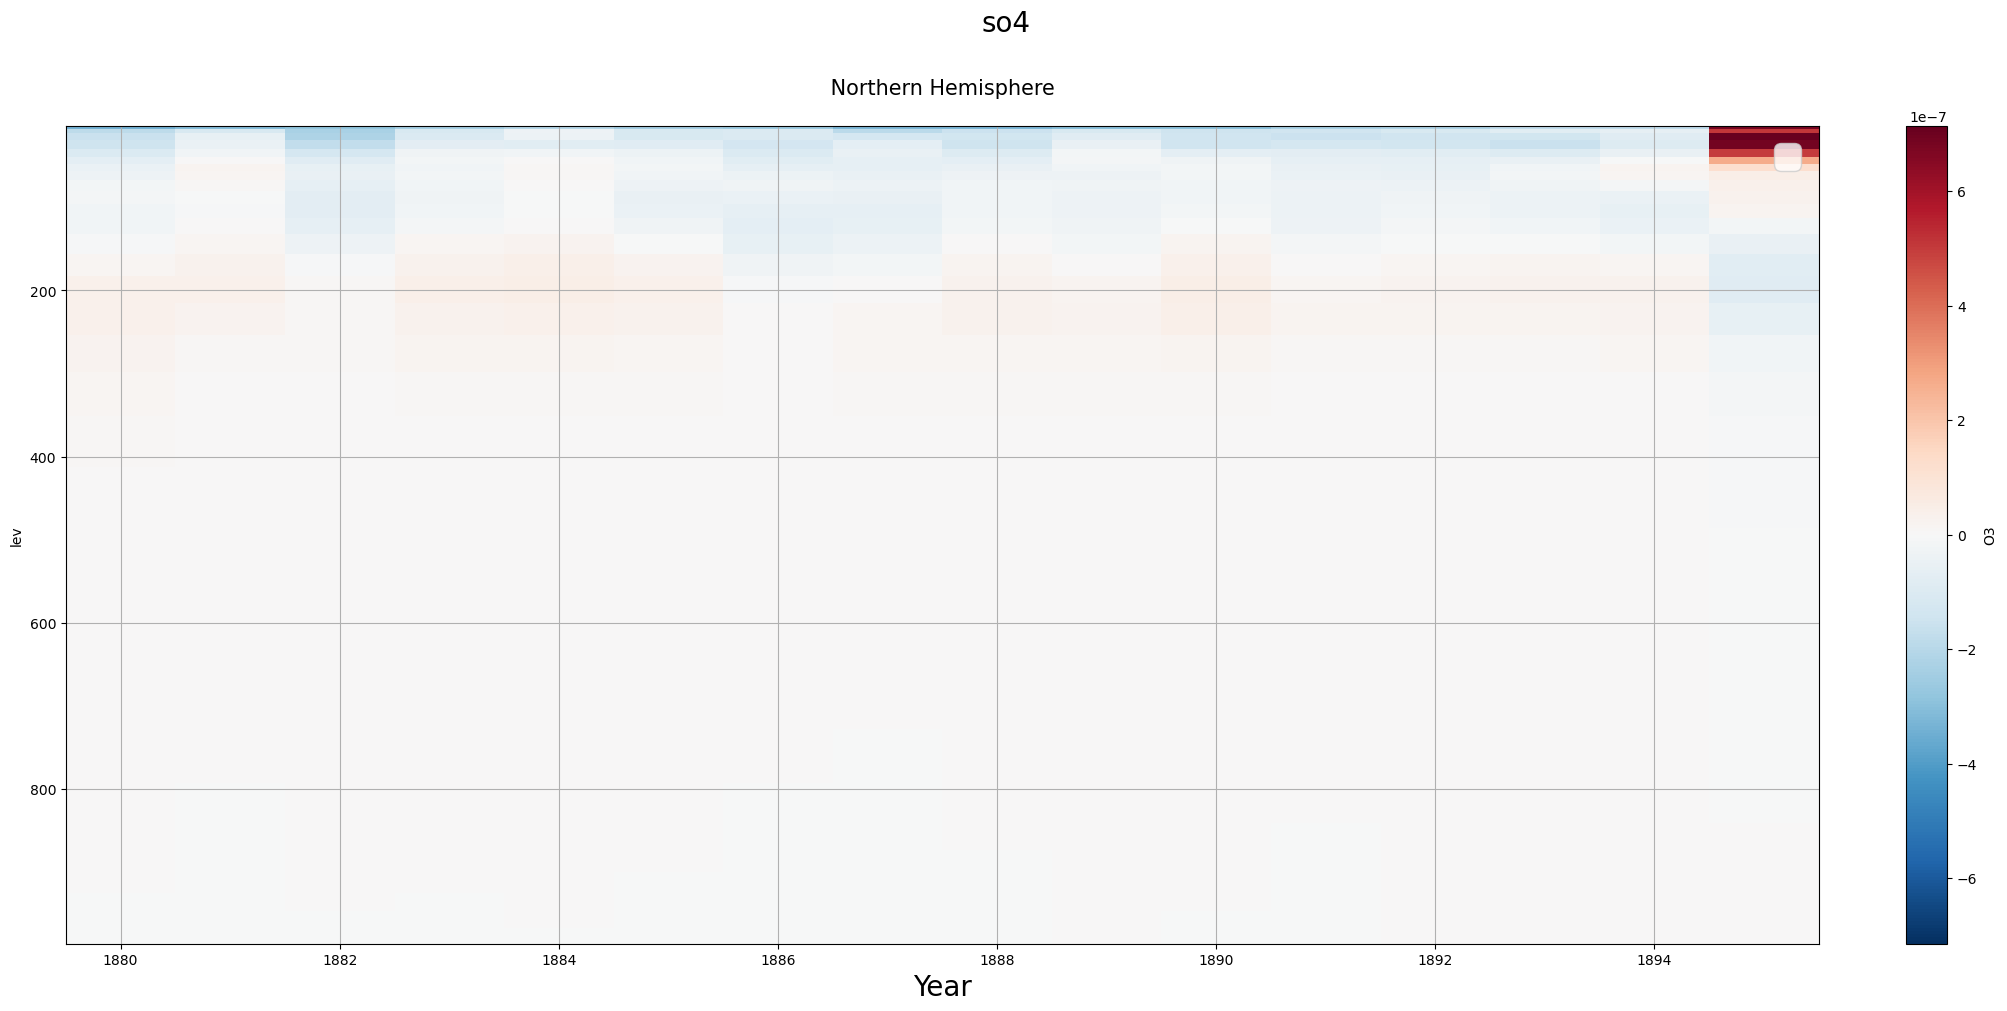

In [69]:
#Plotting
fig, (axs1) = plt.subplots(1, 1, constrained_layout=True, figsize=(20,10))

annual_means.plot(label="NorESM 14", ax=axs1,x='year')

#south_anomaly.plot(label="NorESM 14", ax=axs2)

#global_anomaly.plot(label="NorESM 14",ax=axs3)

fig.suptitle('so4\n', fontsize=20)

axs1.set_xlabel('Year',fontsize=20)
#axs2.set_xlabel('Year',fontsize=20)
#axs3.set_xlabel('Year',fontsize=20)
#axs1.tick_params(fontsize=20)

axs1.grid()
#axs2.grid()
#axs3.grid()

plt.gca().invert_yaxis()

axs1.set_title(" Northern Hemisphere \n" , fontsize=15)
#axs2.set_title(" Southern Hemisphere \n" , fontsize=15)
#axs3.set_title('Global Mean \n', fontsize=15)
plt.legend(fontsize=25)

In [61]:
start = cftime.DatetimeNoLeap(1880,1,15)
end_prior_eruption = cftime.DatetimeNoLeap(1883,1,15)
end = cftime.DatetimeNoLeap(1895,1,15)

dso3 = north_anomaly.sel(time=slice(start,end))

In [52]:
dso3_lev=ds_o3.sel(lev=24, method='nearest').drop('lev')

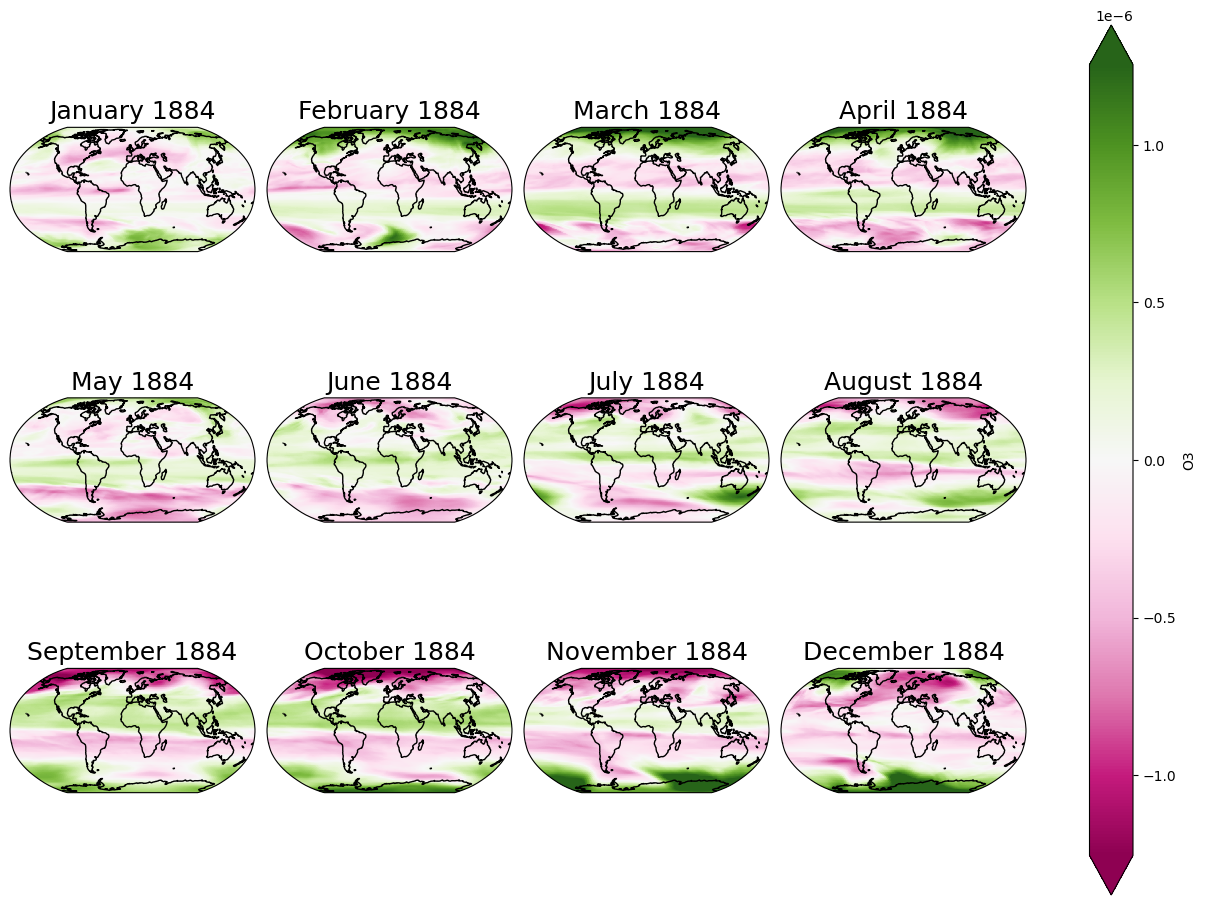

In [59]:
climatology = dso3_lev.sel(time=slice(start, end_prior_eruption)).groupby('time.year').mean('time',keep_attrs=True).mean('year')
#annual_mean = dso3_lev.groupby('time.year').mean('time')
anom=dso3_lev-climatology

multi_plot(anom)